In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

In [2]:
data = pd.read_excel("regression_data.xls")

# Data exploration

## EDA

In [3]:
data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [4]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [5]:
data.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [6]:
data.eq(' ').sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

## Exploring the target variable - price

In [7]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import skew, kurtosis

<AxesSubplot:xlabel='price', ylabel='Density'>

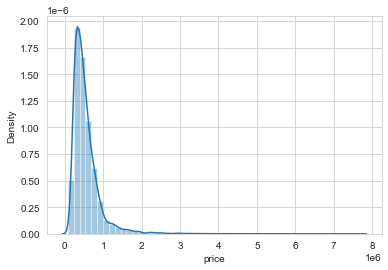

In [8]:
sns.distplot(data.price)

<AxesSubplot:xlabel='price'>

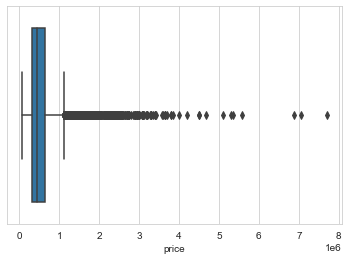

In [9]:
sns.boxplot(data.price)

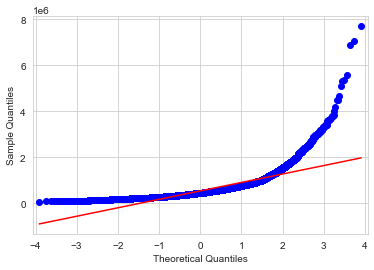

In [10]:
qqplot(data.price, line ='s')
pyplot.show()

In [11]:
# Comments:

# Our target variable is not normally distributed
# Our target variable is right-skewed
# There are multiple outliers

In [12]:
skew(data.price)

4.023085207745834

In [13]:
kurtosis(data.price)

34.53308449607733

In [14]:
# Comments:

# Our target variable is positively skewed
# Our target variable has high value for kurtosis, which suggests 'heavy tails' and consequently existence of outliers.

## Exploring graphically the relationship between price and some predicting variables

In [15]:
# Creating a dataframe with predictor elements that show a correlation coefficient with price > 0.4:

corr_df=data[['bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_living15']]

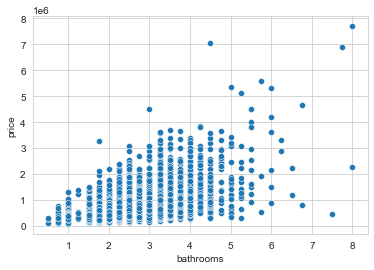

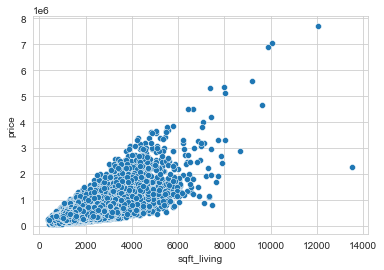

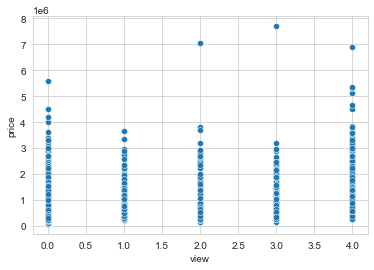

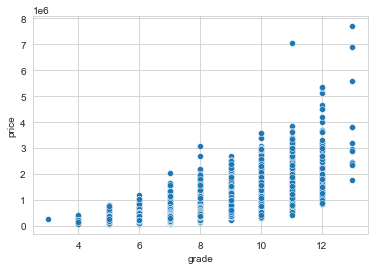

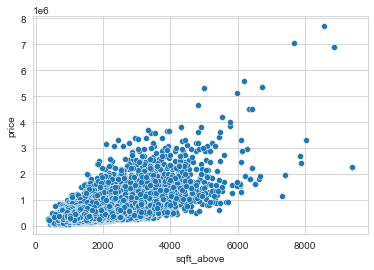

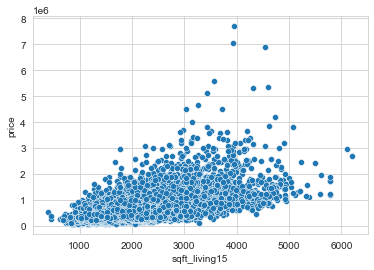

In [16]:
# Scatter plots between corr_df variables and price:

for col in corr_df:
    plt.subplots()
    sns.scatterplot(corr_df[col], data.price)


<AxesSubplot:xlabel='yr_built', ylabel='price'>

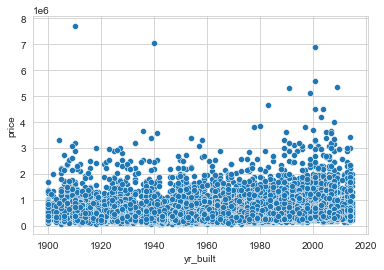

In [17]:
sns.scatterplot(data['yr_built'], data.price)

# Correlation Matrix

In [18]:
data_no_id_date = data.drop(['id', 'date', 'long'], axis=1) #long

## Standard correlation matrix - all variables

In [19]:
#data_matrix = data.corr().sort_values(by=['price'], ascending=False)
data_matrix = data_no_id_date.corr()

In [20]:
# Comments:

# There seems to be a relationship between price and some predictor variables

# There seems to be a high correlation between some predictor variables (i.e. sqft_living and sqft_living15)

# Very little - but some - multicollinearity

In [21]:
c=data_matrix[data_matrix>0.75]

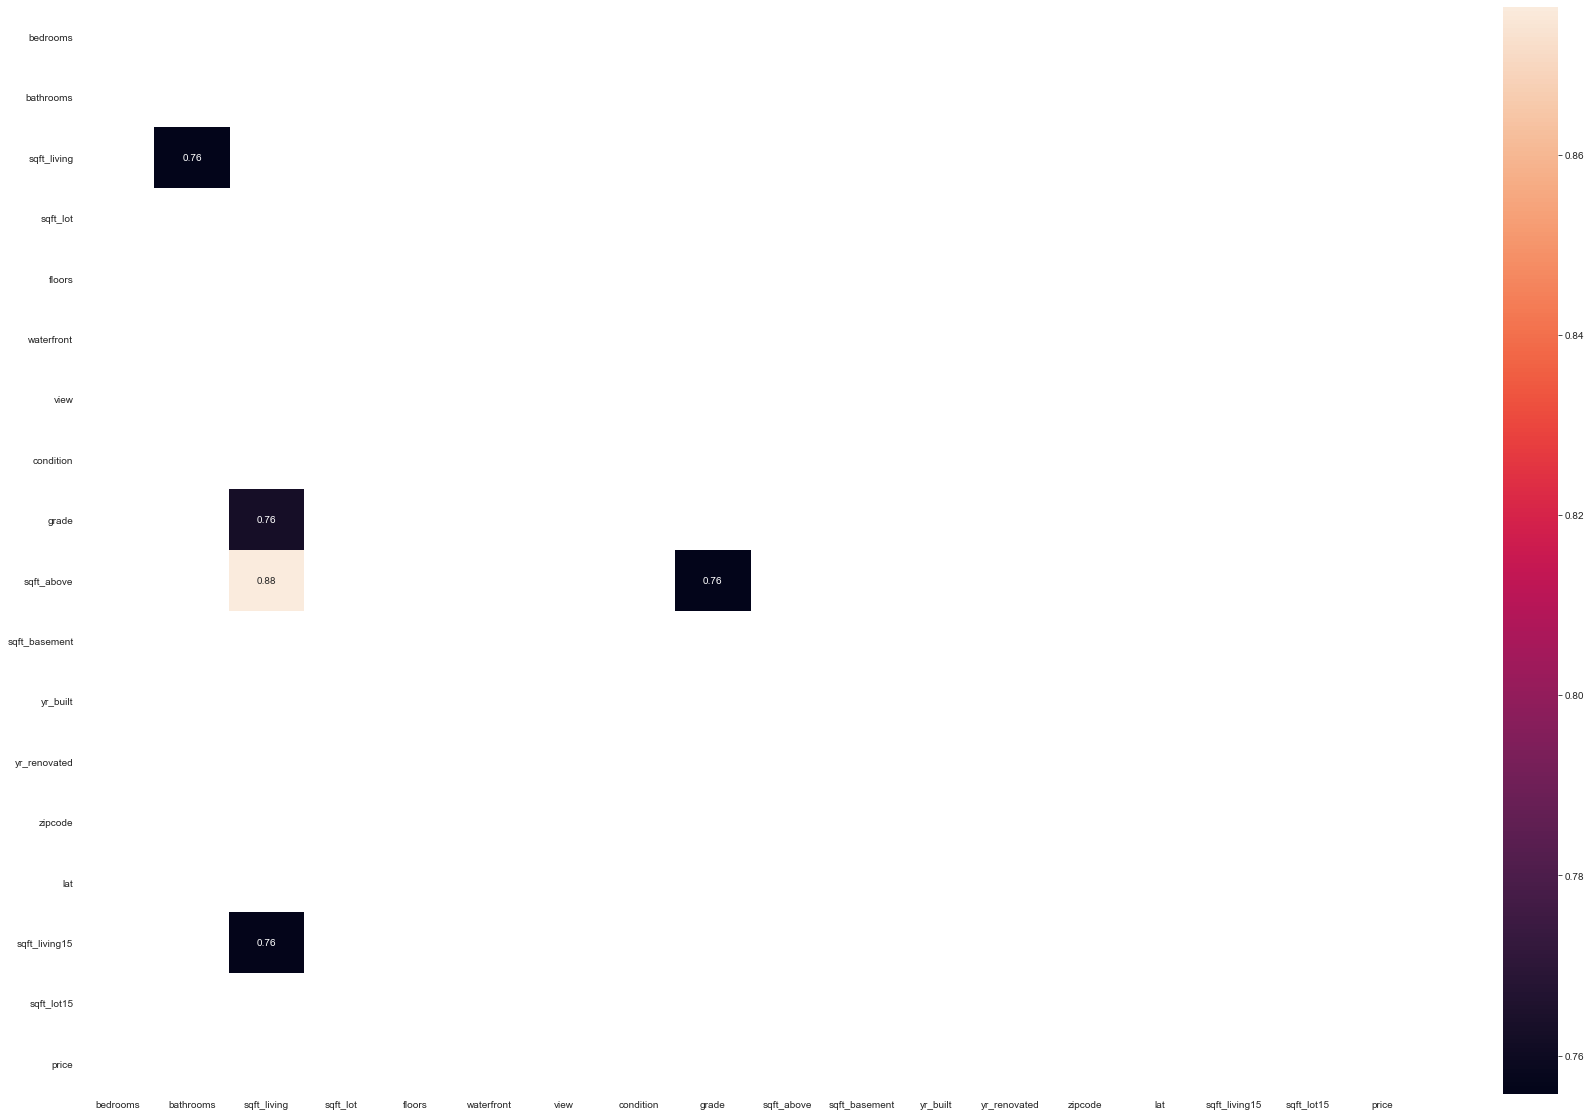

In [22]:
mask = np.zeros_like(c)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(30, 20))
ax = sns.heatmap(c, mask=mask, annot=True)
plt.show()

## Correlation matrix only with correlated predictor variables

In [23]:
data_matrix2 = data[['price','sqft_living', 'sqft_living15', 'grade', 'sqft_above']].corr()

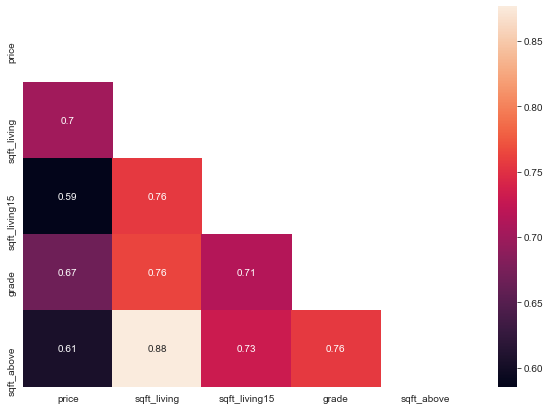

In [24]:
mask = np.zeros_like(data_matrix2)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(data_matrix2, mask=mask, annot=True)
plt.show()

In [25]:
# Based on this, we drop "sqft_above" and "grade" - id and date deleted before
# We can also drop lat and long here, since this info is indirectly present in zipcode:

In [26]:
data_clean = data_no_id_date.drop(['sqft_above', 'lat', 'zipcode'], axis=1) # sqft_above', 'sqft_living15', 'grade'

In [27]:
data_clean.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [28]:
#dict_years = {1900:0, 1901:0, 1902:0, 1903:0, 1904:0, 1905:0, 1906:0, 1907:0, 1908:0, 1909:0, 1910:0, 1911:0, 1912:0, 1913:0, 1914:0, 1915:0, 1916:0, 1917:0, 1918:0, 1919:0, 1920:0, 1921:0, 1922:0, 1923:0, 1924:0, 1925:0, 1926:0, 1927:0, 1928:0, 1929:0, 1930:1, 1931:1, 1932:1, 1933:1, 1934:1, 1935:1, 1936:1, 1937:1, 1938:1, 1939:1, 1940:1, 1941:1, 1942:1, 1943:1, 1944:1, 1945:1, 1946:1, 1947:1, 1948:1, 1949:1, 1950:1, 1951:1, 1952:1, 1953:1, 1954:1, 1955:1, 1956:1, 1957:1, 1958:1, 1959:1, 1960:2, 1961:2, 1962:2, 1963:2, 1964:2, 1965:2, 1966:2, 1967:2, 1968:2, 1969:2, 1970:2, 1971:2, 1972:2, 1973:2, 1974:2, 1975:2, 1976:2, 1977:2, 1978:2, 1979:2, 1980:2, 1981:2, 1982:2, 1983:2, 1984:2, 1985:2, 1986:2, 1987:2, 1988:2, 1989:2, 1990:3, 1991:3, 1992:3, 1993:3, 1994:3, 1995:3, 1996:3, 1997:3, 1998:3, 1999:3, 2000:3, 2001:3, 2002:3, 2003:3, 2004:3, 2005:3, 2006:3, 2007:3, 2008:3, 2009:3, 2010:3, 2011:3, 2012:3, 2013:3, 2014:3, 2015:3}

In [29]:
#data_clean =  data_clean.replace({"yr_built": dict_years})

## VIF test - pilot

In [32]:
import statsmodels.formula.api as sm
import scipy, scipy.stats
import matplotlib.pyplot as plt
from statsmodels.api import add_constant
from numpy import linalg as LA
import statsmodels as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#X = core_df.drop(['price'], axis=1)
#y = core_df['price']

In [ ]:
#vif_data = pd.DataFrame() 
#vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
#vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          #for i in range(len(X.columns))]

# Dummy variables for zipcode

In [33]:
zipcode=data['zipcode']
zipcode_dummy=pd.get_dummies(zipcode, ['zipcode'])

# dropping zipcode from the df where are stiching the dummies:
data_no_id_date = data_no_id_date.drop(['zipcode'], axis=1)

In [34]:
core_df = pd.concat([data_clean, zipcode_dummy],axis=1)

# Feature engineering

In [35]:
# Revisiting the distribution of the variables:

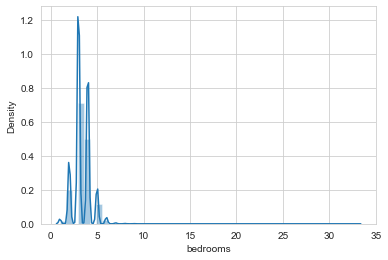

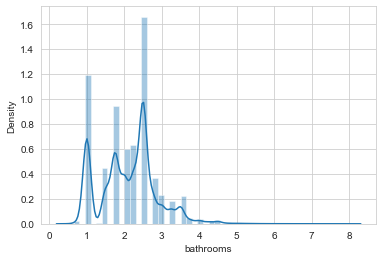

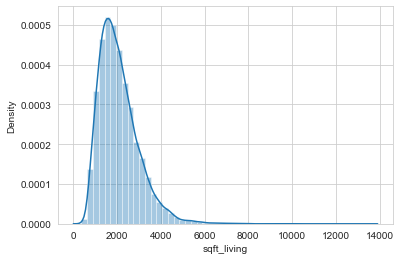

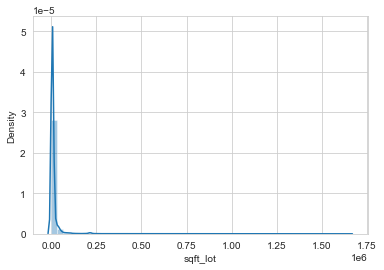

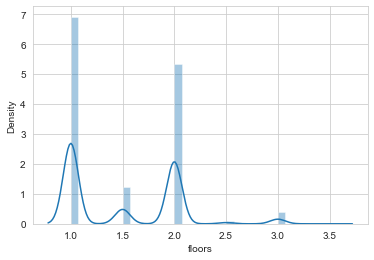

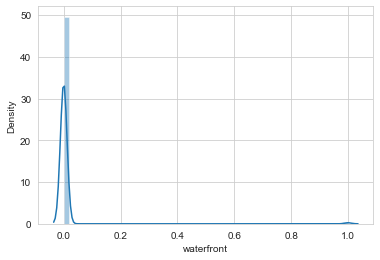

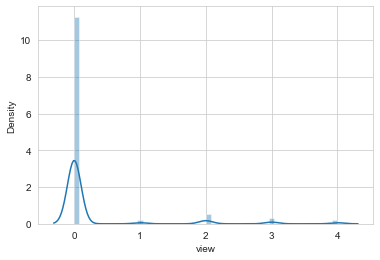

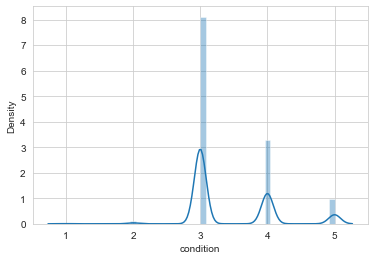

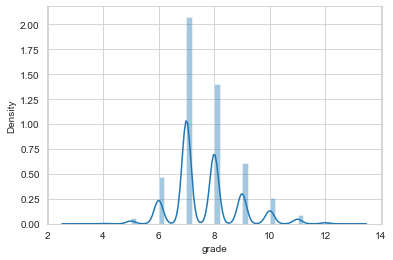

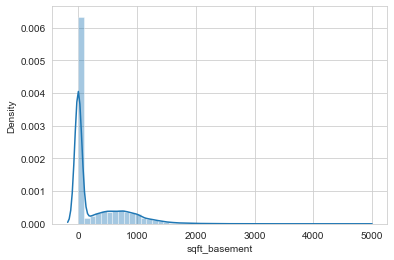

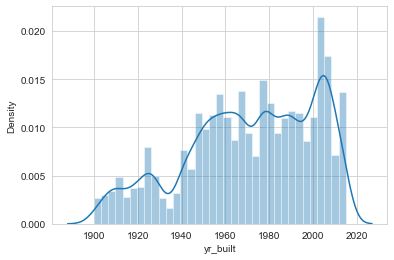

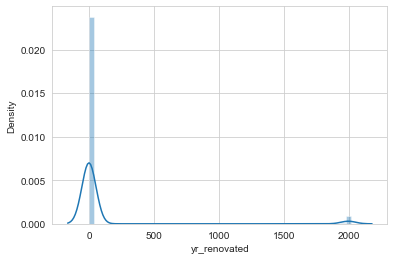

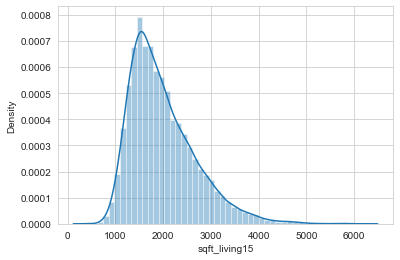

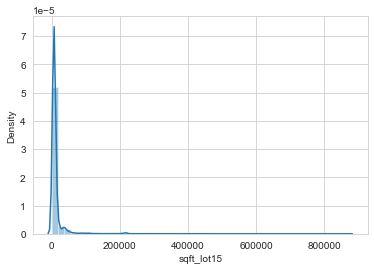

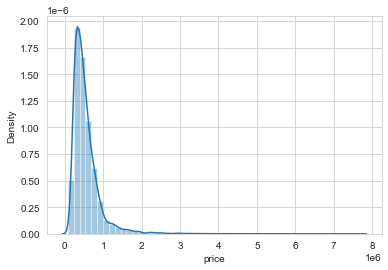

In [36]:
for col in core_df.columns[0:15]:
    sns.distplot(core_df[col])
    plt.show()

In [37]:
def skew_df(df):
    from scipy.stats import skew
    
    cols=list(df.columns)
    
    for col in cols:
        sk=df[col].skew()
        print("the skew of {} is: {}".format(col,sk))

In [38]:
skew_df(core_df.iloc[:, 0:15])

the skew of bedrooms is: 2.023641235344595
the skew of bathrooms is: 0.5197092816403838
the skew of sqft_living is: 1.473215455425834
the skew of sqft_lot is: 13.072603567136046
the skew of floors is: 0.6144969756263127
the skew of waterfront is: 11.380796488678657
the skew of view is: 3.3962358813279967
the skew of condition is: 1.0360374245132955
the skew of grade is: 0.7882366363846076
the skew of sqft_basement is: 1.5768896267534047
the skew of yr_built is: -0.4694499764949978
the skew of yr_renovated is: 4.547572443096434
the skew of sqft_living15 is: 1.1068753971161713
the skew of sqft_lot15 is: 9.524361965117942
the skew of price is: 4.023364652271239


In [ ]:
# Based on the distribution plots and skewness for the continuous variables, we decided to apply a log transformation
# on the positively skewed variables:

# sqft_lot, sqft_lot15, price

In [ ]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [ ]:
def exp_transform_clean_(x):
    if np.isfinite(x):
        return np.exp(x)
    else:
        return np.NAN

In [ ]:
X = core_df_.drop(['price'], axis=1)
y = core_df_['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
# log transforming - training set

#X_train["sqft_lot"] = list(map(log_transfom_clean_, X_train["sqft_lot"]))
#X_train["sqft_lot15"] = list(map(log_transfom_clean_, X_train["sqft_lot15"]))
#X_train["price"] = list(map(log_transfom_clean_, X_train["sqft_lot"]))
#y_train = list(map(log_transfom_clean_, y_train))

In [ ]:
# Log transforming - test set

#X_test["sqft_lot"] = list(map(log_transfom_clean_, X_test["sqft_lot"]))
#X_test["sqft_lot15"] = list(map(log_transfom_clean_, X_test["sqft_lot15"]))
#X_test["price"] = list(map(log_transfom_clean_, X_test["sqft_lot"]))


#y_test = list(map(log_transfom_clean_, y_test))

In [ ]:
# Reversing the log:

#y_test_predict = list(map(exp_transform_clean_, y_test_predict))
#y_test = list(map(exp_transform_clean_, y_test))

In [ ]:
core_df.columns

# Filters, bucketing and outliers

## Bucketing years

In [ ]:
#dict_years = {1900:2, 1901:2, 1902:2, 1903:2, 1904:2, 1905:2, 1906:2, 1907:2, 1908:2, 1909:2, 1910:2, 1911:2, 1912:2, 1913:2, 1914:2, 1915:2, 1916:2, 1917:2, 1918:2, 1919:2, 1920:2, 1921:2, 1922:2, 1923:2, 1924:2, 1925:2, 1926:2, 1927:2, 1928:2, 1929:2, 1930:1, 1931:1, 1932:1, 1933:1, 1934:1, 1935:1, 1936:1, 1937:1, 1938:1, 1939:1, 1940:1, 1941:1, 1942:1, 1943:1, 1944:1, 1945:1, 1946:1, 1947:1, 1948:1, 1949:1, 1950:1, 1951:1, 1952:1, 1953:1, 1954:1, 1955:1, 1956:1, 1957:1, 1958:1, 1959:1, 1960:1, 1961:1, 1962:1, 1963:1, 1964:1, 1965:1, 1966:1, 1967:1, 1968:1, 1969:1, 1970:1, 1971:1, 1972:1, 1973:1, 1974:1, 1975:1, 1976:1, 1977:1, 1978:1, 1979:1, 1980:1, 1981:1, 1982:1, 1983:1, 1984:1, 1985:1, 1986:1, 1987:1, 1988:1, 1989:1, 1990:2, 1991:2, 1992:2, 1993:2, 1994:2, 1995:2, 1996:2, 1997:2, 1998:2, 1999:2, 2000:2, 2001:2, 2002:2, 2003:2, 2004:2, 2005:2, 2006:2, 2007:2, 2008:2, 2009:2, 2010:2, 2011:2, 2012:2, 2013:2, 2014:2, 2015:2}

In [ ]:
#core_df =  core_df.replace({"yr_built": dict_years})

In [ ]:
#core_df.head()

## Year renovated - binary

In [ ]:
def year_clean(x):
    if x>0:
        return 1
    else:
        return 0

In [ ]:
## Outliers

In [ ]:
#core_df["yr_renovated"] = list(map(year_clean, core_df["sqft_lot"]))

## Outliers

In [ ]:
#iqr = np.percentile(data_2['price'],75) - np.percentile(data_2['price'],25)
#upper_limit = np.percentile(data_2['price'],75) + 2*iqr
#lower_limit = np.percentile(data_2['price'],25) - 2*iqr


# Models - no data transformation

## Linear regression

In [39]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
X = core_df.drop(['price'], axis=1)
y = core_df['price']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
predictions_df = pd.DataFrame(predictions,columns=["price"])

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
import math

mse = mean_squared_error(y_test, predictions)
print("The MSE value is: ",round(mse,2))
    
rmse = math.sqrt(mse)
print("The RMSE value is: ",round(rmse,2))
    
r2 = r2_score(y_test, predictions)
print("The R2 value is: ",round(r2,2))
    
N = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(N-1)/(N-p-1))
print("The R_adj^{2} value  is: ",round(adj_r2,2))
    
results_error_matrix=[mse,rmse,r2,adj_r2]

The MSE value is:  31316069841.04
The RMSE value is:  176963.47
The R2 value is:  0.79
The R_adj^{2} value  is:  0.78


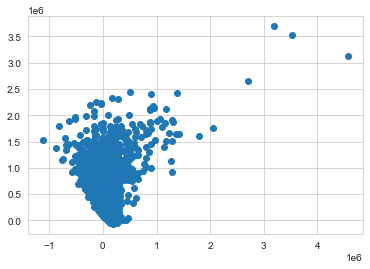

In [43]:
residuals = y_test-predictions

plt.scatter(residuals,predictions)

In [44]:
# abs(y_test-y_pred)/y_test

In [45]:
y_test_list = list(y_test)

In [46]:
temp_df = pd.DataFrame(list(zip(y_test_list,predictions)))
temp_df["new_cal"] = abs(temp_df[0]-temp_df[1])/temp_df[0]
temp_df["new_cal"].mean()

0.19695314166274483

In [47]:
print("The Relative absolute error is:",temp_df["new_cal"].mean())

The Relative absolute error is: 0.19695314166274483


In [48]:
temp_df = pd.concat([pd.DataFrame(y_test),pd.DataFrame(predictions)],axis=1)
temp_df

,price,0
0,NaN,646711.516052
1,538000.0,386174.727844
2,180000.0,203362.756958
3,604000.0,513261.112427
4,NaN,269234.593994
...,...,...
21576,475000.0,NaN
21577,1090000.0,NaN
21580,679950.0,NaN
21583,810000.0,NaN


## Polynomial

In [49]:
pd.set_option("display.max_columns",None)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [50]:
X = core_df.drop(['price'], axis=1)
y = core_df['price']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [52]:
%timeit polynomial_features= PolynomialFeatures(degree=3)

1.72 µs ± 26.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [53]:
polynomial_features= PolynomialFeatures(degree=2)


X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.fit_transform(X_test)


model = LinearRegression()
model.fit(X_poly_train, y_train)

y_poly_pred = model.predict(X_poly_test)

rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
r2 = r2_score(y_test,y_poly_pred)
print(rmse)
print(r2)

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse))
print("R2 score of test set is {}".format(r2))
N = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(N-1)/(N-p-1))
print("Adj_R2 score of test set is {}".format(adj_r2))

127553.56743089177
0.888879036745589
The model performance for the test set
-------------------------------------------
RMSE of test set is 127553.56743089177
R2 score of test set is 0.888879036745589
Adj_R2 score of test set is 0.8874194337880643


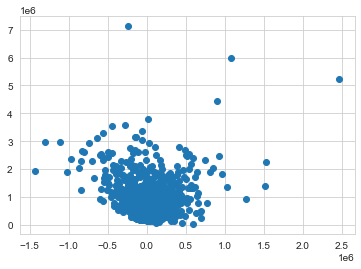

In [54]:
residuals = y_test-y_poly_pred

plt.scatter(residuals,y_poly_pred)

<AxesSubplot:xlabel='price', ylabel='Density'>

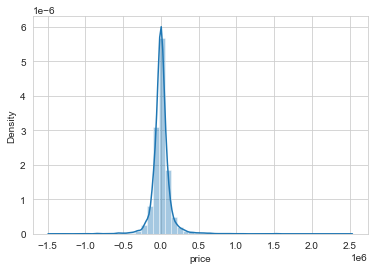

In [55]:
sns.distplot(residuals)

In [56]:
y_test_list=list(y_test)

In [57]:
# Error calculation

temp_df = pd.DataFrame(list(zip(y_test_list,y_poly_pred)))
temp_df["new_cal"] = abs(temp_df[0]-temp_df[1])/temp_df[0]
temp_df["new_cal"].mean()

0.1396668713947391

In [ ]:
print("The R_adj^{2} value  is: ",temp_df["new_cal"].mean())

## Random Forest

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from sklearn import metrics

In [ ]:
X = core_df.drop(['price'], axis=1)
y = core_df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

In [ ]:
y_pred = rf_reg.predict(X_test)

In [ ]:
rsqure_score = rf_reg.score(X_test,y_test)
print('R^2: {}'.format(rsqure_score))

In [ ]:
N = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(N-1)/(N-p-1))
print("The R_adj^{2} value  is: ",round(rsqure_score,2))

In [ ]:
y_test_RF=list(y_test)

In [ ]:
temp_df = pd.DataFrame(list(zip(y_test_RF,predictions)))
temp_df["new_cal"] = abs(temp_df[0]-temp_df[1])/temp_df[0]
temp_df["new_cal"].mean()

In [ ]:
print("The Relative absolute error is:",temp_df["new_cal"].mean())

## KNN regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def model_testing(X_train, X_test, y_train, y_test):
    scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
    for i in range(2,7): # The values of K. = 2,3,4,5,6,7,8,9
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
    return scores


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [ ]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X, y, test_size=0.3, random_state=100)


model_testing(X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,7), model_testing(X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN), color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

## Other models explored

In [ ]:
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

from termcolor import colored as cl

In [ ]:
X = core_df.drop(['price'], axis=1)
y = core_df['price']

In [ ]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [ ]:
# 1. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 2. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 3. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 4. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)


In [ ]:
#R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

## Lasso test - pilot

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
lasso_test = data.drop(['date'], axis=1)


In [ ]:
lasso_test.head()

In [ ]:
X = lasso_test.drop(['price'], axis=1)
y = lasso_test['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, y_train)

# Data standardization

In [ ]:
core_df.head()

## Standardization - StandardScaler, MinMax, Normalizer

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

### Standardization and linear regression

In [ ]:
X = core_df.drop(['price'], axis=1)
y = core_df['price']

In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

scaler = scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
predictions_df = pd.DataFrame(predictions,columns=["price"])

In [ ]:
mse = mean_squared_error(y_test, predictions)
print("The MSE value is: ",round(mse,2))
    
rmse = math.sqrt(mse)
print("The RMSE value is: ",round(rmse,2))
    
r2 = r2_score(y_test, predictions)
print("The R2 value is: ",round(r2,2))
    
N = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(N-1)/(N-p-1))
print("The R_adj^{2} value  is: ",round(adj_r2,2))
    
results_error_matrix=[mse,rmse,r2,adj_r2]

### Standardization and polynomial

In [ ]:
X = core_df.drop(['price'], axis=1)
y = core_df['price']

In [ ]:
scaler = Normalizer()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
# transform data

scaler = scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)


X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.fit_transform(X_test)


model = LinearRegression()
model.fit(X_poly_train, y_train)

y_poly_pred = model.predict(X_poly_test)

rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
r2 = r2_score(y_test,y_poly_pred)
print(rmse)
print(r2)

In [ ]:
# plots about errors of the model, percentual error

### Standardization and random forest

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from sklearn import metrics

In [ ]:
X = core_df.drop(['price'], axis=1)
y = core_df['price']

In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

scaler = scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

In [ ]:
y_pred = rf_reg.predict(X_test)

In [ ]:
rsqure_score = rf_reg.score(X_test,y_test)
print('R^2: {}'.format(rsqure_score))

In [ ]:
N = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(N-1)/(N-p-1))
print("The R_adj^{2} value  is: ",round(rsqure_score,2))

### Standardization and KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X = core_df.drop(['price'], axis=1)
y = core_df['price']

In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

scaler = scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [ ]:
def model_testing(X_train, X_test, y_train, y_test):
    scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
    for i in range(2,7): # The values of K. = 2,3,4,5,6,7,8,9
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
    return scores


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [ ]:
model_testing(X_train, X_test, y_train, y_test)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,7), model_testing(X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN), color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

In [ ]:
# Dataframe to resume data

In [ ]:
#df2 = pd.DataFrame(np.array([[0.79, 0.80, 0.47], [0.20, 0.20, 6]]),
                   columns=['R2', 'Relative absolute error'])